In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set(rc={'figure.figsize': (12, 6)})
pd.set_option("display.max_columns", None)


In [2]:
df = pd.read_csv("../data/processed/final_user_dataset.csv")
df.head()


,user_id,persona,age,monthly_income,account_age_days,gender,default_payment_method,city,total_sessions,num_product_page_visits,num_cart_visits,num_checkout_visits,avg_time_on_product,late_night_session_ratio,device_preference,total_purchases,total_spent,avg_purchase_value,avg_discount_used,impulse_purchase_ratio,past_impulse_purchases,avg_minutes_to_purchase,stress_level,mood_last_week,saving_habit_score,impulse_buy_score
0,1,deal_hunter,26,19171.159754,407,Male,COD,Kolkata,91,40,6,8,60.155970,0.263736,mobile,1.0,633.140530,633.140530,20.0,1.000000,1.0,114.000000,2.784591,Neutral,2,67.367810
1,2,cautious_low_income,53,8782.230465,1682,Male,UPI,Chennai,81,37,9,5,53.451353,0.222222,mobile,3.0,805.056024,268.352008,15.0,0.666667,2.0,172.666667,7.452283,Anxious,1,52.401868
2,3,window_shopper,23,21322.656727,1742,Female,UPI,Pune,98,52,6,10,57.032507,0.255102,mobile,1.0,214.213010,214.213010,0.0,0.000000,0.0,7.000000,6.656153,Neutral,2,30.601595
3,4,steady_buyer,41,34460.232897,1554,Female,UPI,Mumbai,84,46,6,7,67.746872,0.226190,mobile,2.0,3589.063108,1794.531554,10.0,1.000000,2.0,84.500000,5.599376,Sad,4,76.135555
4,5,impulse_buyer,43,60992.559100,844,Female,Card,Hyderabad,76,36,11,6,63.432677,0.447368,mobile,1.0,849.147425,849.147425,50.0,1.000000,1.0,77.000000,7.391644,Happy,1,88.559413


In [3]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   50000 non-null  int64  
 1   persona                   50000 non-null  object 
 2   age                       50000 non-null  int64  
 3   monthly_income            50000 non-null  float64
 4   account_age_days          50000 non-null  int64  
 5   gender                    50000 non-null  object 
 6   default_payment_method    50000 non-null  object 
 7   city                      50000 non-null  object 
 8   total_sessions            50000 non-null  int64  
 9   num_product_page_visits   50000 non-null  int64  
 10  num_cart_visits           50000 non-null  int64  
 11  num_checkout_visits       50000 non-null  int64  
 12  avg_time_on_product       50000 non-null  float64
 13  late_night_session_ratio  50000 non-null  float64
 14  device

,count,mean,std,min,25%,50%,75%,max
user_id,50000.0,25000.500000,14433.901067,1.000000,12500.750000,25000.500000,37500.250000,50000.000000
age,50000.0,38.592040,12.120027,18.000000,28.000000,39.000000,49.000000,59.000000
monthly_income,50000.0,45372.183196,29458.069038,8000.000000,28949.785968,37508.308202,50259.753898,218454.014594
account_age_days,50000.0,1017.967700,568.846227,30.000000,527.000000,1018.000000,1511.000000,1999.000000
total_sessions,50000.0,87.877220,8.853105,53.000000,82.000000,88.000000,94.000000,128.000000
num_product_page_visits,50000.0,39.569680,6.075156,17.000000,35.000000,39.000000,44.000000,66.000000
num_cart_visits,50000.0,10.550740,3.236899,1.000000,8.000000,10.000000,13.000000,28.000000
num_checkout_visits,50000.0,7.032080,2.633710,0.000000,5.000000,7.000000,9.000000,21.000000
avg_time_on_product,50000.0,60.054877,6.429647,35.874843,55.649229,59.809642,64.239014,90.130326
late_night_session_ratio,50000.0,0.279442,0.103263,0.034091,0.204751,0.262500,0.333333,0.666667


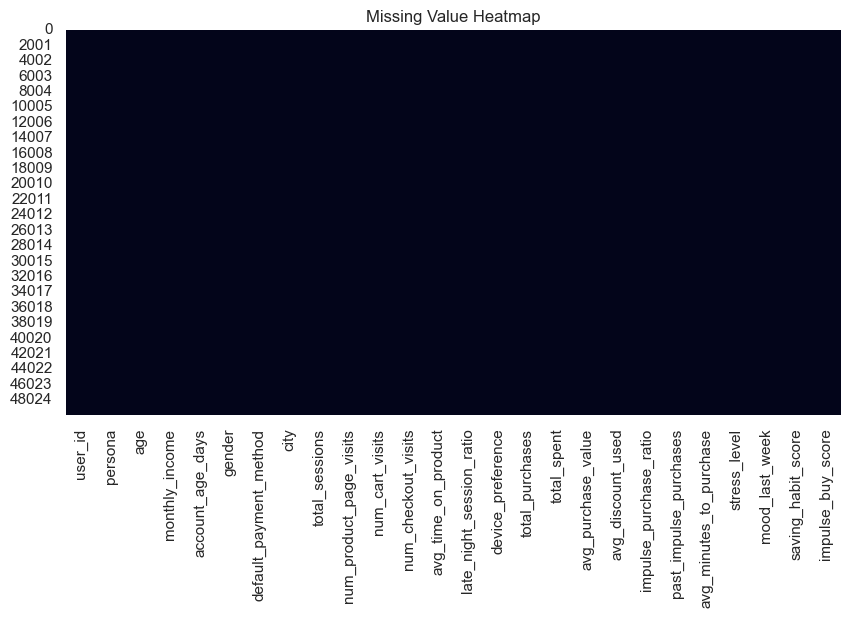

In [4]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


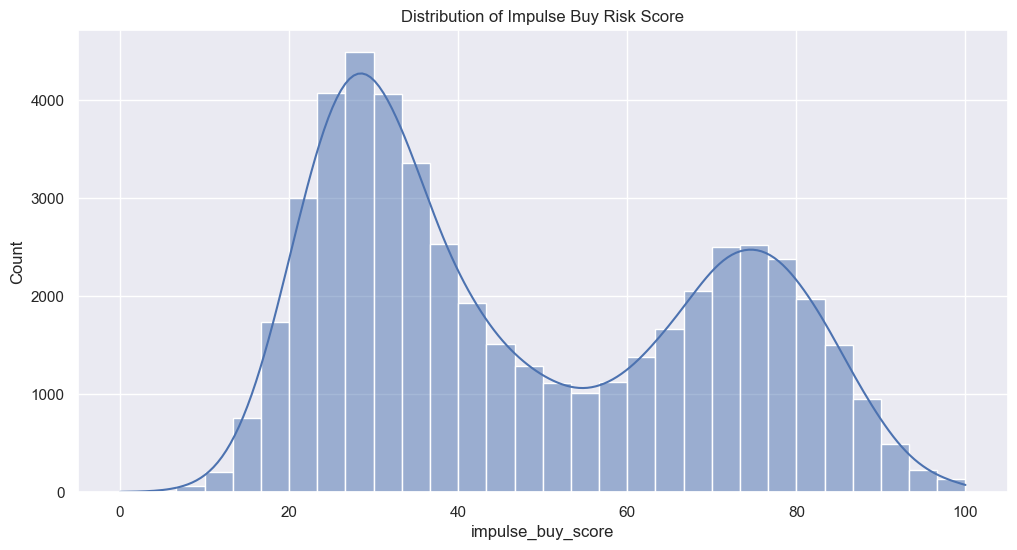

In [5]:
sns.histplot(df["impulse_buy_score"], bins=30, kde=True)
plt.title("Distribution of Impulse Buy Risk Score")
plt.show()


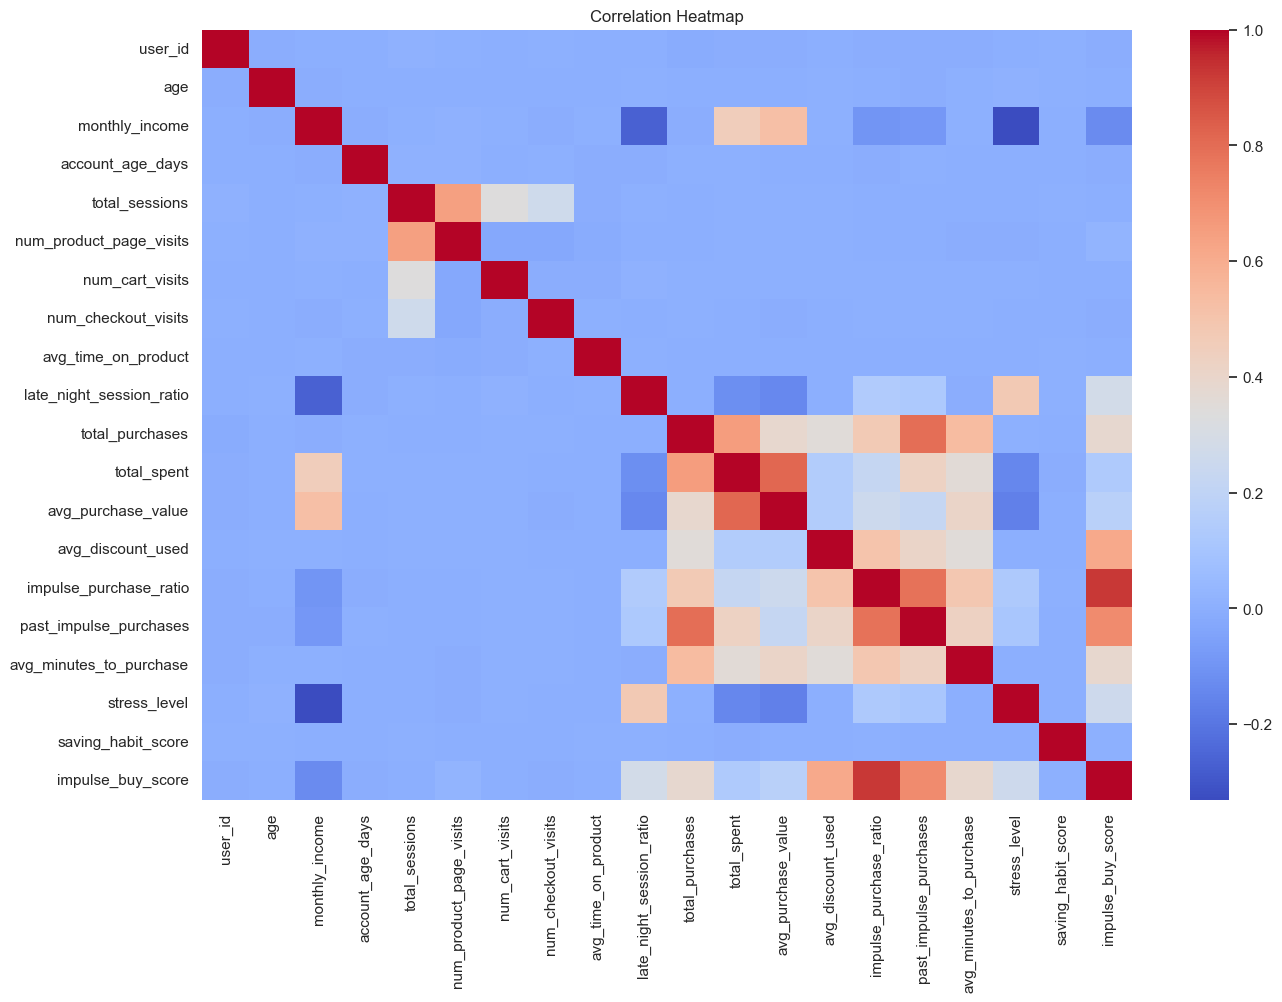

In [6]:
plt.figure(figsize=(15,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [7]:
target_corr = (
    df.corr(numeric_only=True)["impulse_buy_score"]
    .sort_values(ascending=False)
)
target_corr.head(10)


impulse_buy_score           1.000000
impulse_purchase_ratio      0.925926
past_impulse_purchases      0.709824
avg_discount_used           0.613654
avg_minutes_to_purchase     0.391127
total_purchases             0.383609
late_night_session_ratio    0.279463
stress_level                0.260913
avg_purchase_value          0.173276
total_spent                 0.136048
Name: impulse_buy_score, dtype: float64

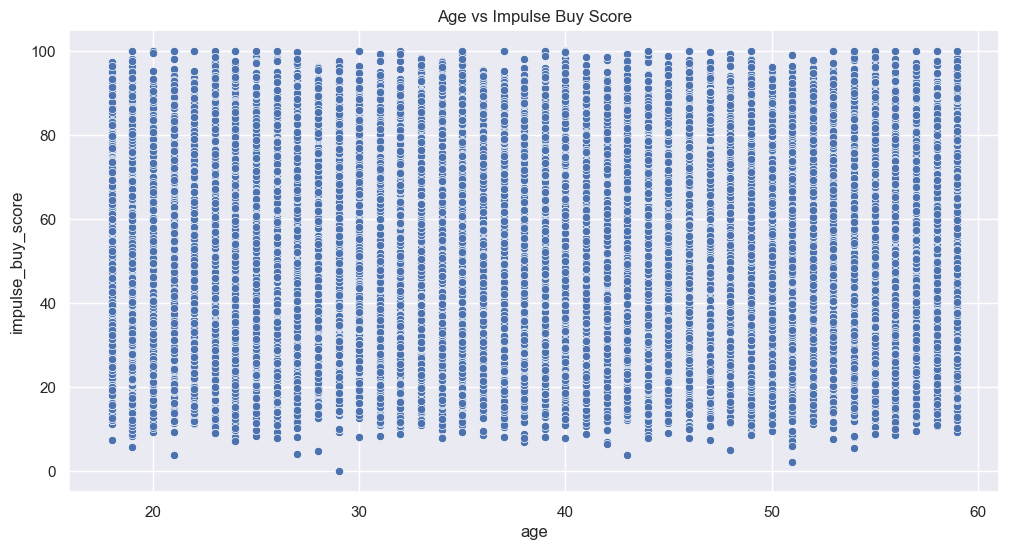

In [8]:
sns.scatterplot(x=df["age"], y=df["impulse_buy_score"])
plt.title("Age vs Impulse Buy Score")
plt.show()


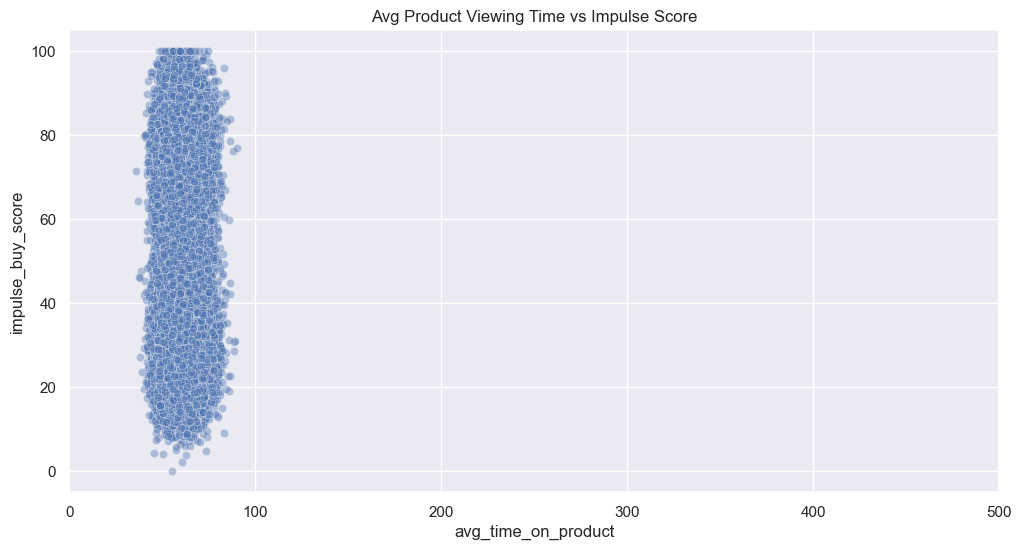

In [9]:
sns.scatterplot(
    x=df["avg_time_on_product"],
    y=df["impulse_buy_score"],
    alpha=0.4
)
plt.xlim(0, 500)
plt.title("Avg Product Viewing Time vs Impulse Score")
plt.show()


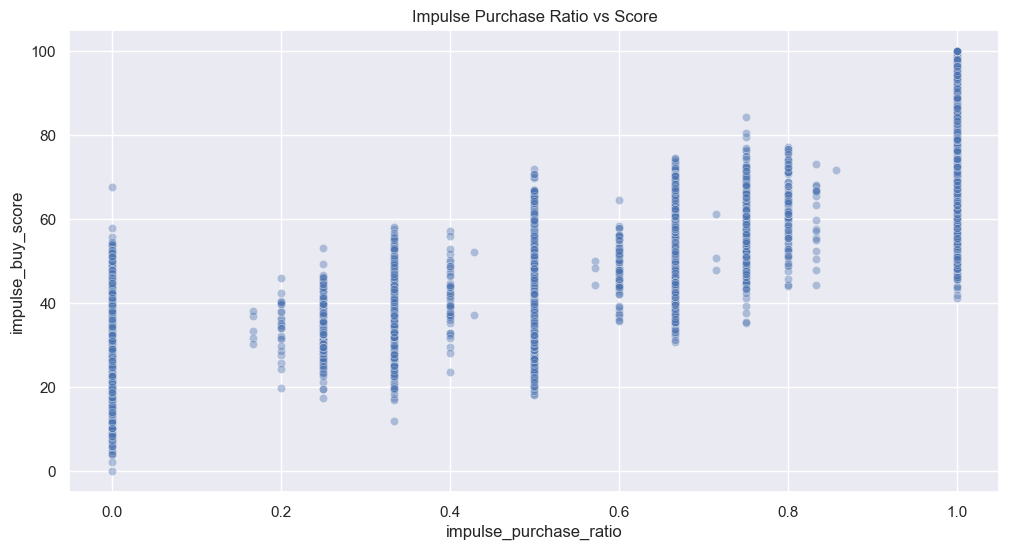

In [10]:
sns.scatterplot(
    x=df["impulse_purchase_ratio"],
    y=df["impulse_buy_score"],
    alpha=0.4
)
plt.title("Impulse Purchase Ratio vs Score")
plt.show()


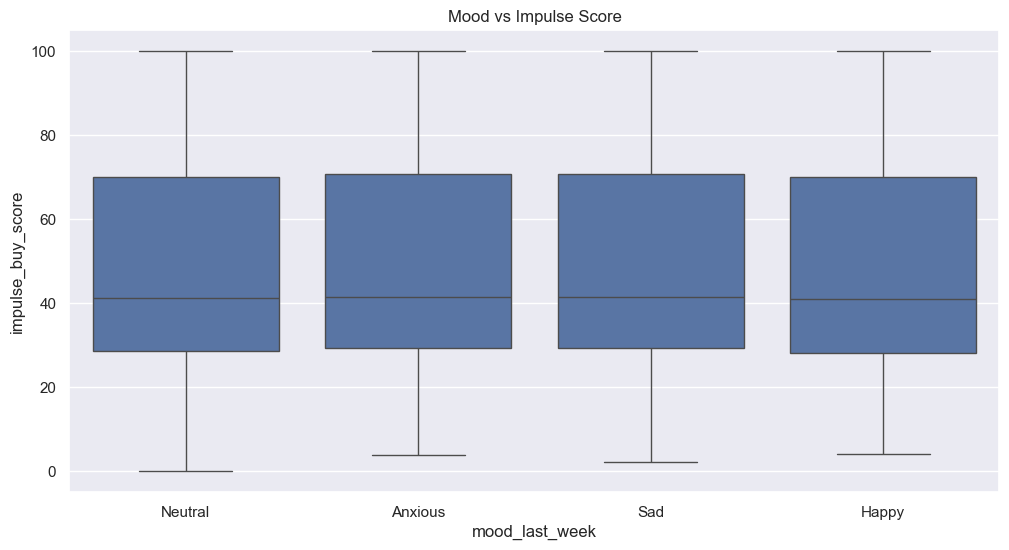

In [11]:
sns.boxplot(x=df["mood_last_week"], y=df["impulse_buy_score"])
plt.title("Mood vs Impulse Score")
plt.show()


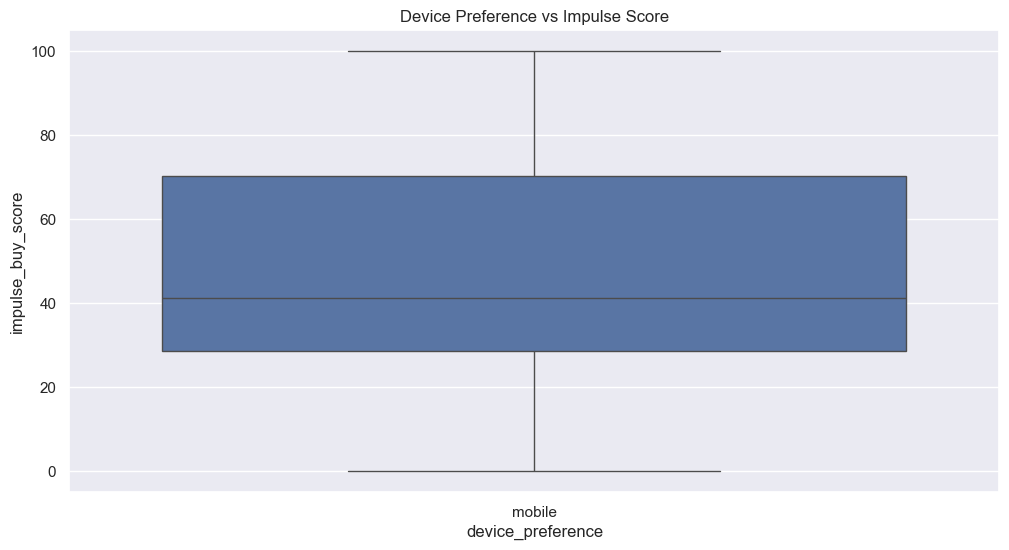

In [12]:
sns.boxplot(x=df["device_preference"], y=df["impulse_buy_score"])
plt.title("Device Preference vs Impulse Score")
plt.show()


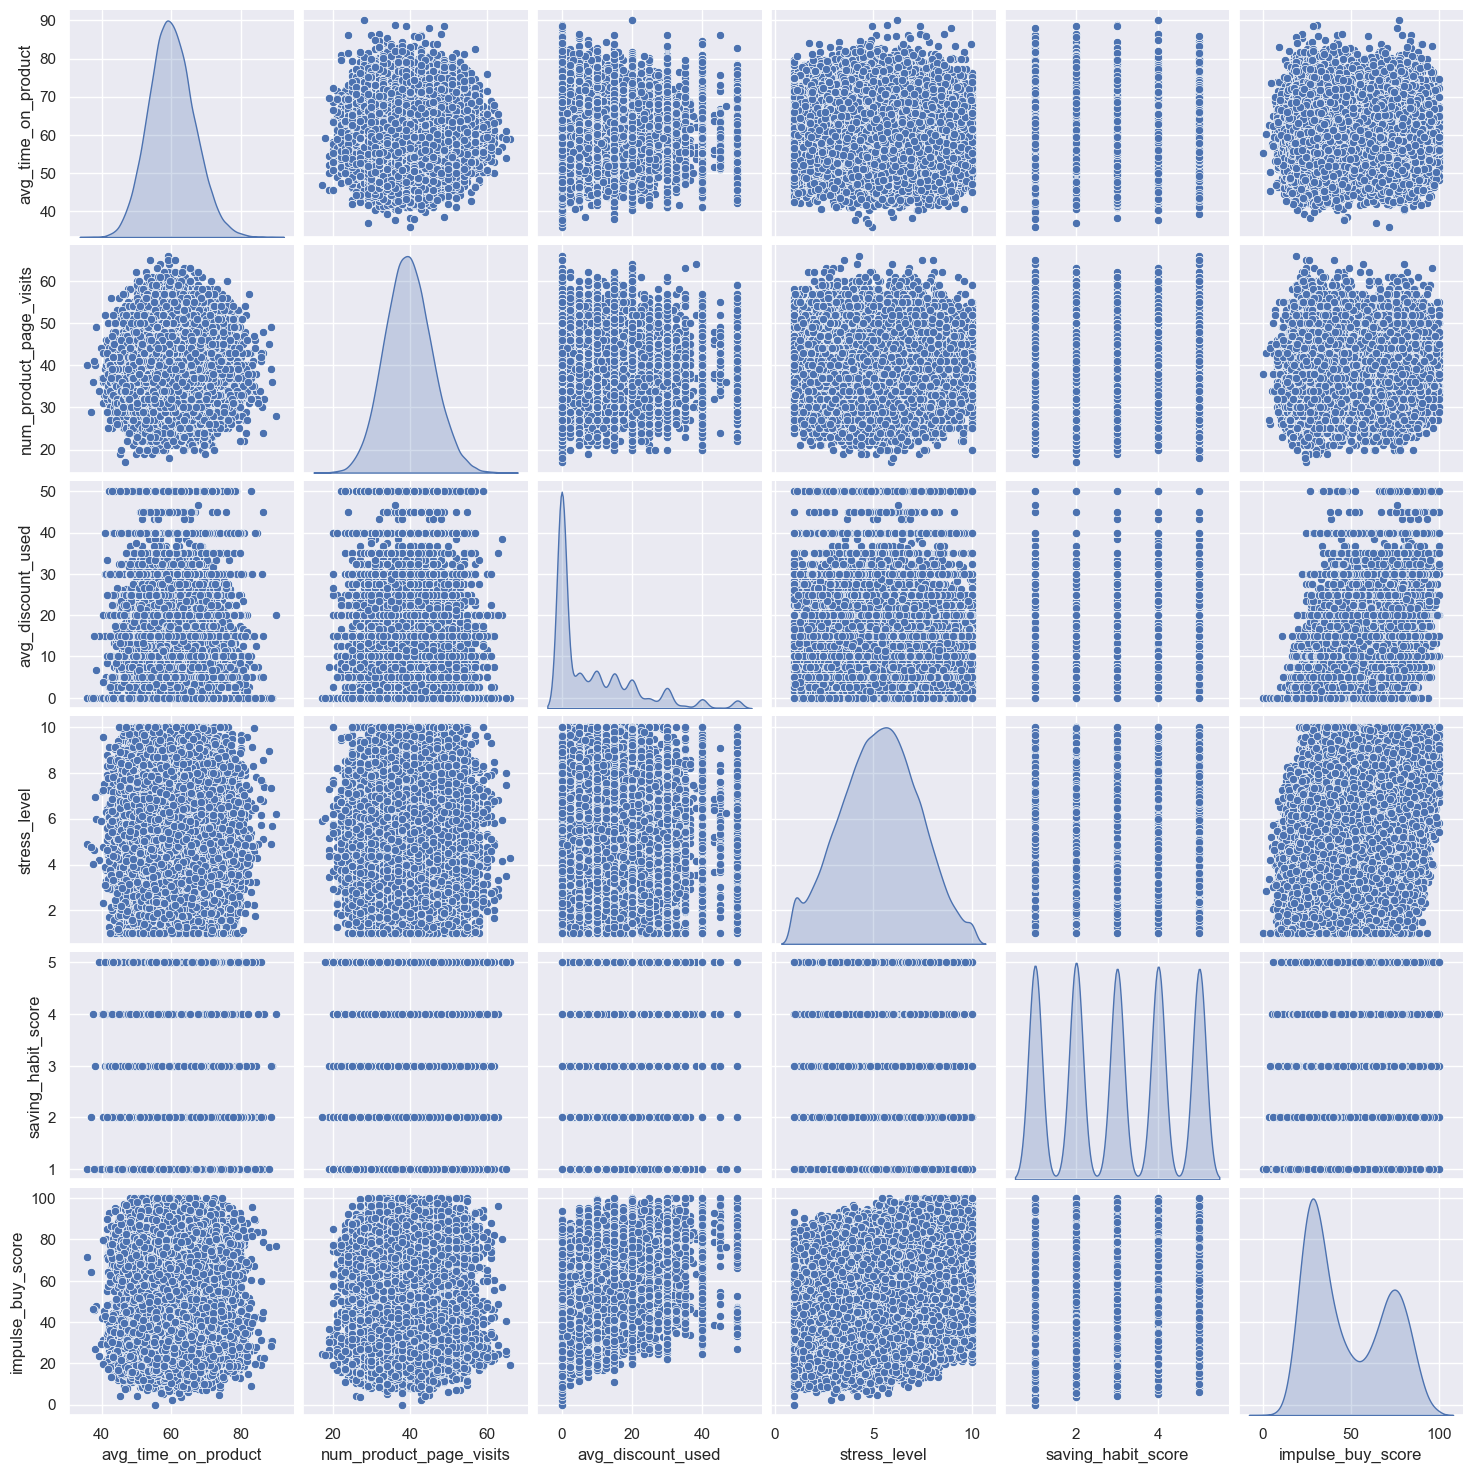

In [13]:
sns.pairplot(df[[
    "avg_time_on_product",
    "num_product_page_visits",
    "avg_discount_used",
    "stress_level",
    "saving_habit_score",
    "impulse_buy_score"
]], diag_kind="kde")
plt.show()


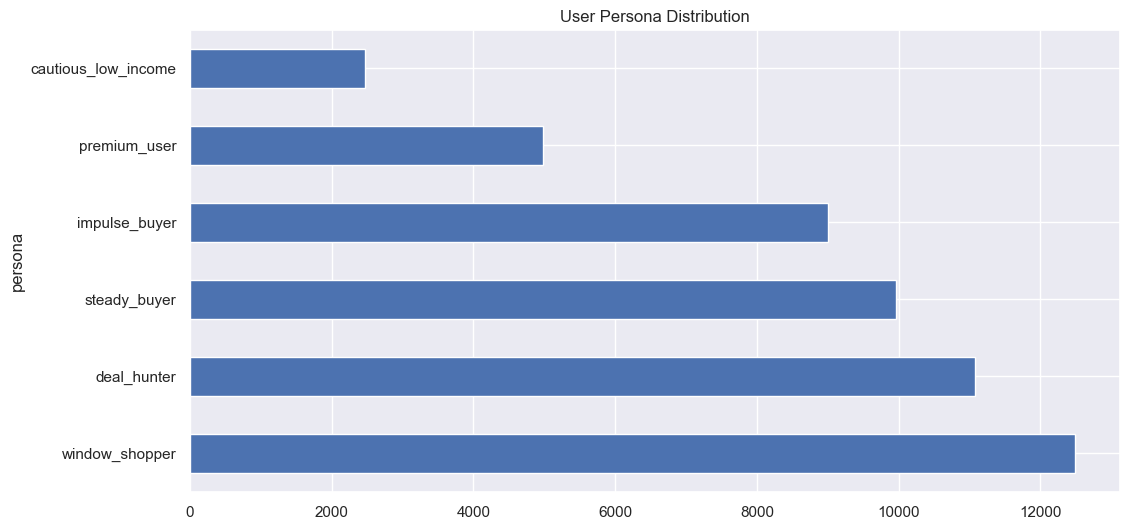

In [14]:
df["persona"].value_counts().plot(kind="barh")
plt.title("User Persona Distribution")
plt.show()


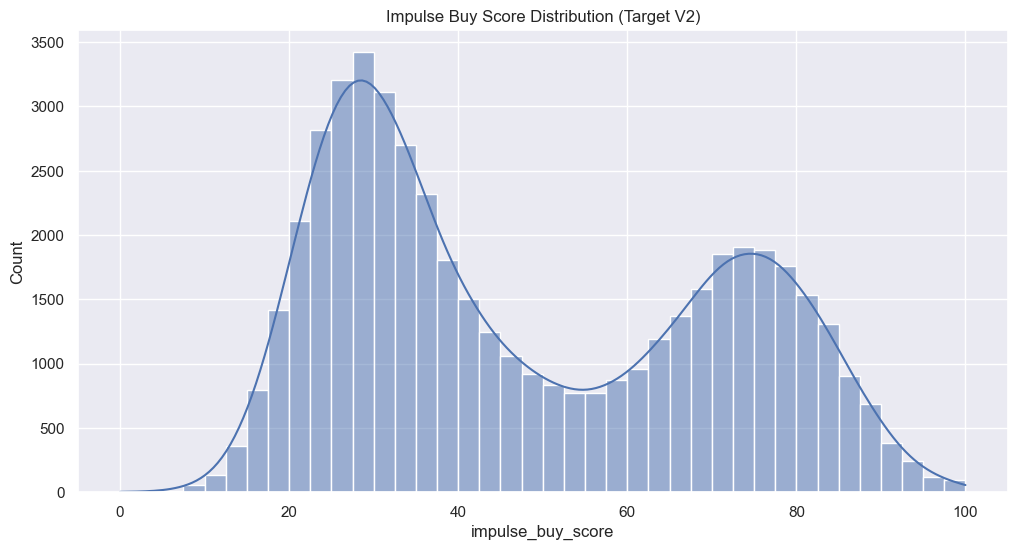

In [15]:
sns.histplot(df["impulse_buy_score"], bins=40, kde=True)
plt.title("Impulse Buy Score Distribution (Target V2)")
plt.show()


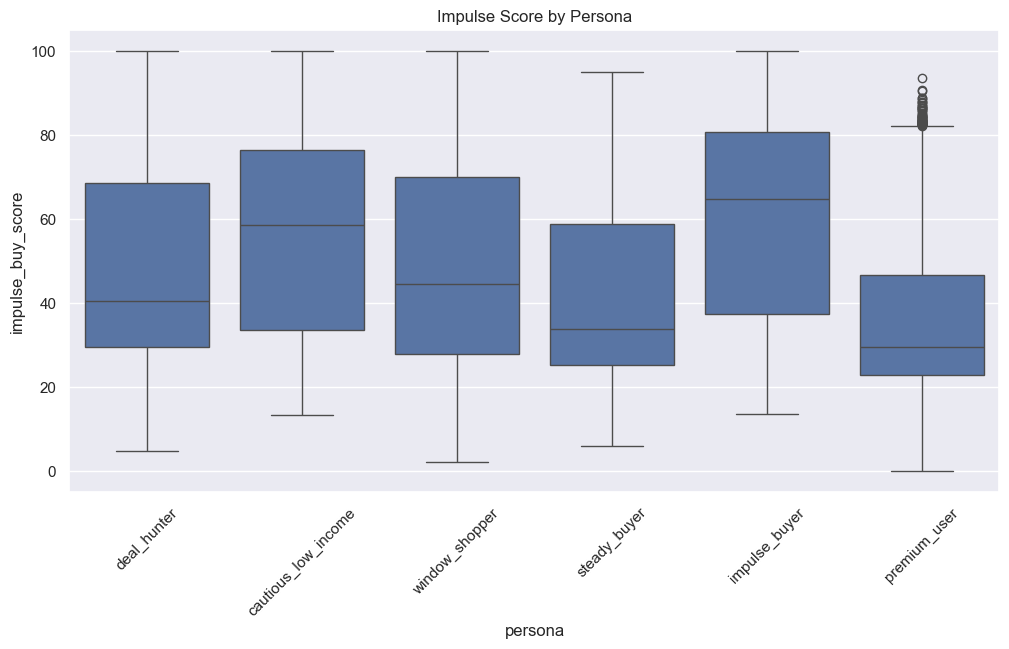

In [16]:
sns.boxplot(data=df, x="persona", y="impulse_buy_score")
plt.xticks(rotation=45)
plt.title("Impulse Score by Persona")
plt.show()
